In [1]:
import yt
from yt import YTArray
from yt import YTQuantity

from astropy import constants as const

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import SymLogNorm, LogNorm

import palettable
import plotting_tools as pt
import yt_functions as ytf

yt : [INFO     ] 2019-10-22 10:49:45,839 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-22 10:49:45,841 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-22 10:49:45,842 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-22 10:49:45,844 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-22 10:49:45,845 Parameters: cosmological_simulation   = 0.0


In [2]:
from yt.funcs import just_one
xn, yn, zn = [('gas', "%s_%s" % ('magnetic_field', ax)) for ax in 'xyz']
print(xn, yn, zn)
div_fac = 2
sl_left = slice(None, -2, None)
sl_right = slice(2, None, None)
#sl_right = 1
#sl_left = -1
def _divB(field, data):
    
    ds = div_fac * just_one(data["index", "dx"])
    fdata = data[xn[0], 'relative_%s' % xn[1]]

    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)

    f  = fdata[sl_right,1:-1,1:-1]/ds
    f -= fdata[sl_left ,1:-1,1:-1]/ds
    
    ds = div_fac * just_one(data["index", "dy"])
    fdata = data[yn[0], 'relative_%s' % yn[1]]
    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)
    f += fdata[1:-1,sl_right,1:-1]/ds
    f -= fdata[1:-1,sl_left ,1:-1]/ds
    
    ds = div_fac * just_one(data["index", "dz"])
    fdata = data[zn[0], 'relative_%s' % zn[1]]
    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)
    f += fdata[1:-1,1:-1,sl_right]/ds
    f -= fdata[1:-1,1:-1,sl_left ]/ds
    new_field = data.ds.arr(
        np.zeros(data[xn].shape, dtype=np.float64), f.units)
    
    if len(fdata) < 128:
        new_field[1:-1,1:-1,1:-1] = f
    else:
        new_field = YTArray(np.concatenate(f.in_units('G/kpc')), 'G/kpc')
    
    return new_field


def plot_divB(ds, vrange = 1e-4):
    ad = ds.all_data()
    x = ad[('gas', 'x')].in_units('kpc').reshape(128, 128, 128)
    y = ad[('gas', 'y')].in_units('kpc').reshape(128, 128, 128)
    z = ad[('gas', 'z')].in_units('kpc').reshape(128, 128, 128)
    bmag = ad[('gas', 'magnetic_field_strength')].in_units('G').reshape(128, 128, 128)
    divB = ad[('gas', 'divB')].in_units('G/kpc').reshape(126, 126, 126)
    data_x = np.zeros((126, 126))
    data_y = np.zeros((126, 126))
    data_z = np.zeros((126, 126))
    for i in range(126):
        data_x += divB[i, :, :] / 126 / bmag[i, 1:-1, 1:-1] 
        data_y += divB[:, i, :] / 126 / bmag[1:-1, i, 1:-1] 
        data_z += divB[:, :, i] / 126 / bmag[1:-1, 1:-1, i]


    fig, ax = plt.subplots(ncols = 3, figsize=(31, 10), sharex = True, sharey = True)
    pcm = ax[0].pcolormesh(y[0, 1:-1, 1:-1], z[0, 1:-1, 1:-1], data_x, cmap = 'coolwarm', \
                           norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)
   # fig.colorbar(pcm, pad = 0, ax = ax[0])
    
    pcm = ax[1].pcolormesh(x[1:-1, 0, 1:-1], z[1:-1, 0, 1:-1], data_y, cmap = 'coolwarm', \
                               norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)

  #  fig.colorbar(pcm, pad = 0, ax = ax[1])

    pcm = ax[2].pcolormesh(x[1:-1, 1:-1, 0], y[1:-1, 1:-1, 0], data_z, cmap = 'coolwarm', \
                                     norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)
    fig.colorbar(pcm, pad = 0, ax = ax[2])
    ax[0].set_xlabel('y (kpc)')
    ax[0].set_ylabel('z (kpc)')
    ax[1].set_xlabel('x (kpc)')
    ax[1].set_ylabel('z (kpc)')
    ax[2].set_xlabel('x (kpc)')
    ax[2].set_ylabel('y (kpc)')
    
    fig.tight_layout()

('gas', 'magnetic_field_x') ('gas', 'magnetic_field_y') ('gas', 'magnetic_field_z')


yt : [INFO     ] 2019-10-22 11:16:51,104 Parameters: current_time              = 1.4999990202718
yt : [INFO     ] 2019-10-22 11:16:51,105 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-22 11:16:51,106 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2019-10-22 11:16:51,107 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2019-10-22 11:16:51,108 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-22 11:16:51,121 Gathering a field list (this may take a moment.)
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  if __name__ == '__main__':


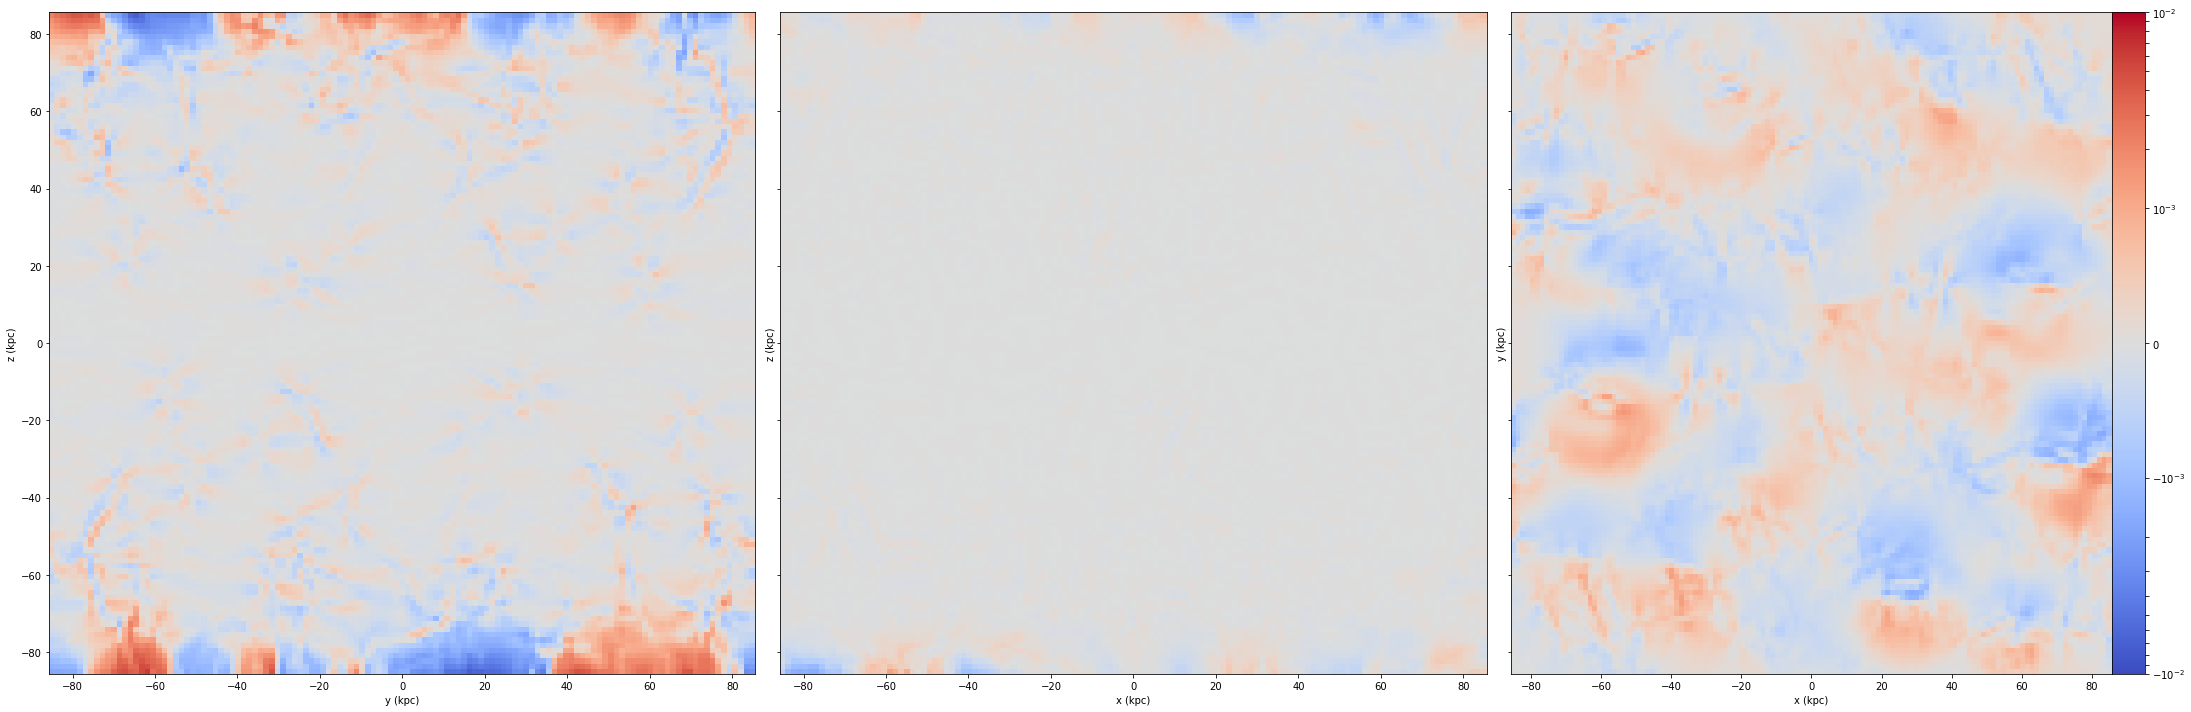

In [17]:
folder = 'isentropic_tctf_1.0_beta_4.0'
#folder = 'isothermal_btest'
#folder = 'isentropic_btest'

#folder = 'btest_nograv_courant'

i = 15
ds = yt.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ds.add_field(('gas', 'divB'), function = _divB, units = 'G/kpc')
plot_divB(ds, vrange = 1e-2)

yt : [INFO     ] 2019-10-22 11:17:00,321 Projection completed
yt : [INFO     ] 2019-10-22 11:17:00,323 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-22 11:17:00,323 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-22 11:17:00,324 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-22 11:17:00,325 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-22 11:17:00,326 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800
yt : [INFO     ] 2019-10-22 11:17:00,332 Making a fixed resolution buffer of (('gas', 'magnetic_field_z')) 800 by 800
yt : [INFO     ] 2019-10-22 11:17:00,337 Making a fixed resolution buffer of (('gas', 'magnetic_field_y')) 800 by 800
yt : [INFO     ] 2019-10-22 11:17:00,341 Making a fixed resolution buffer of (('gas', 'magnetic_field_x')) 800 by 800
yt : [WARNING  ] 2019-10-22 11:17:00,447 Plot image for field ('gas', 'magnetic_field_z') has both positive and negative values. Min = -16419453407593134.000000, Max = 11542255059979784.00000


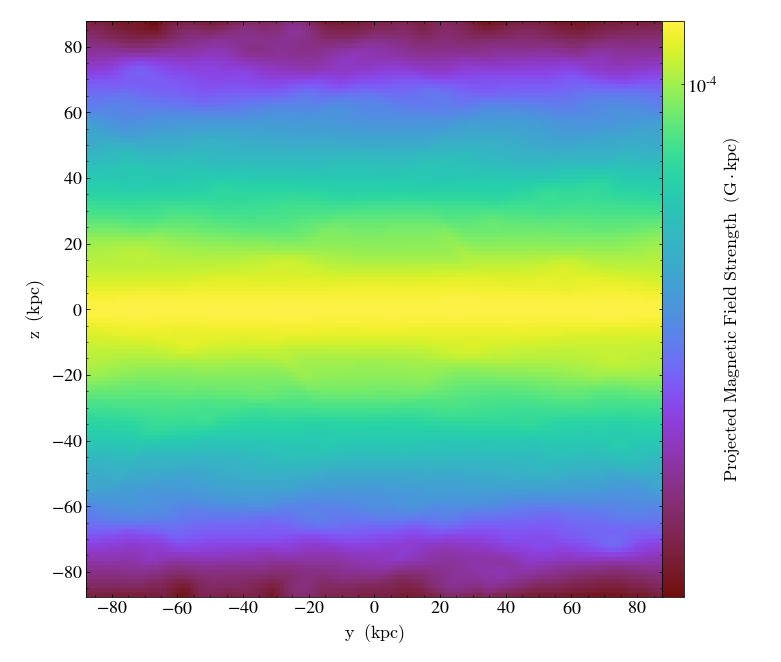
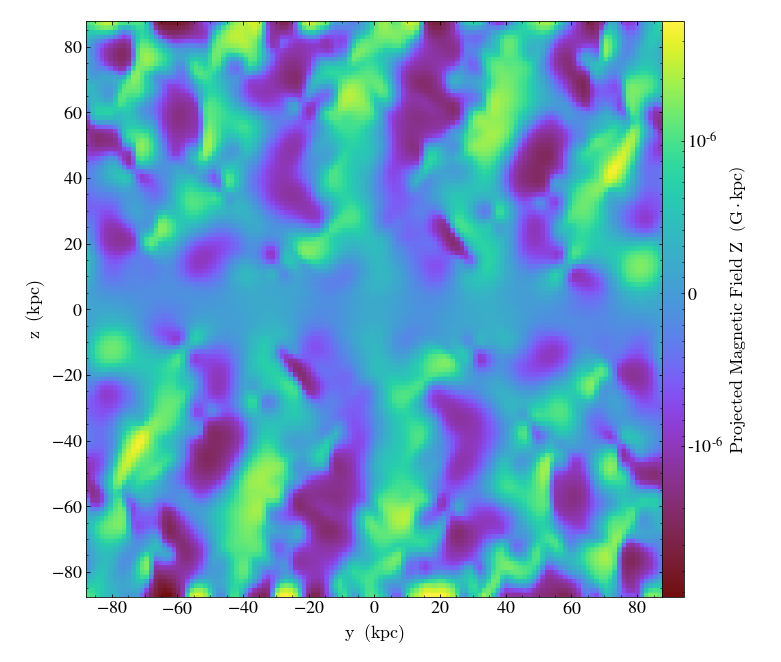
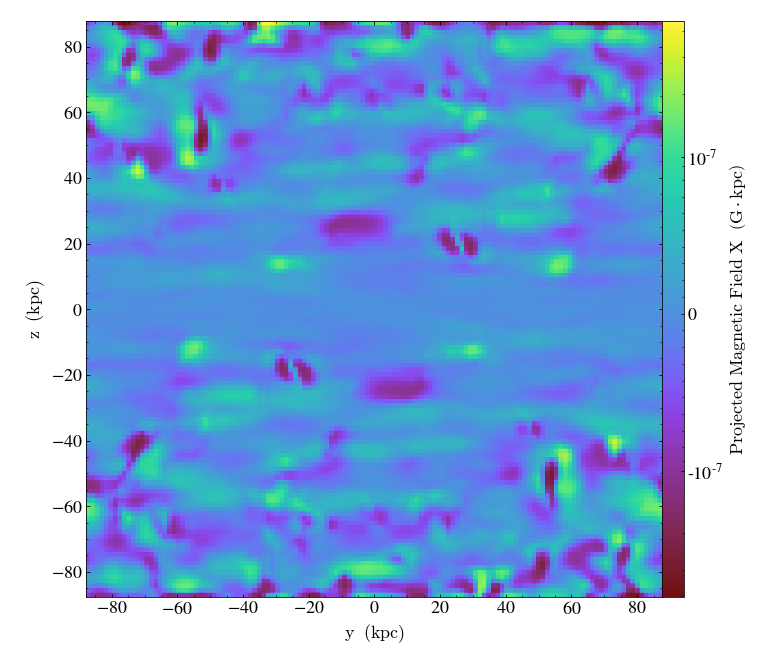
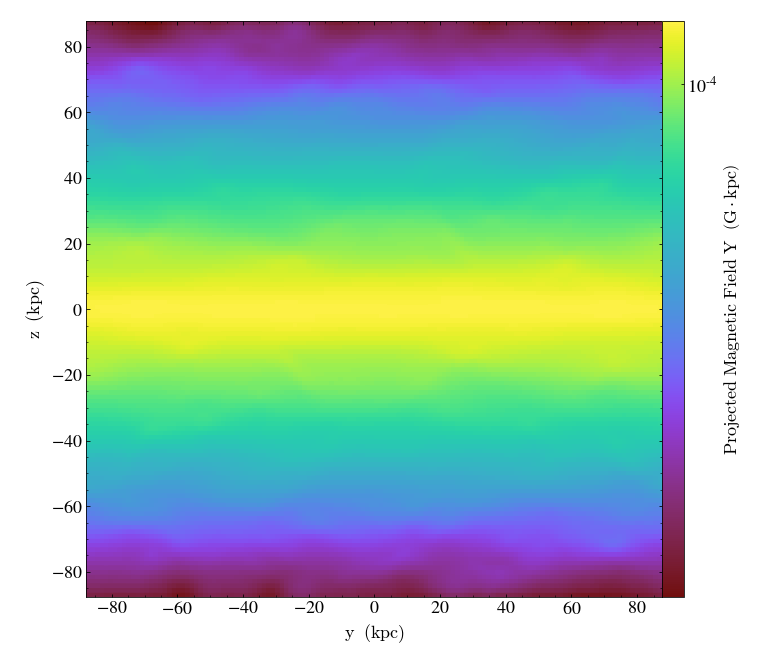

In [18]:
field_list = [('gas', 'magnetic_field_strength'), ('gas', 'magnetic_field_z'), \
             ('gas', 'magnetic_field_y'), ('gas', 'magnetic_field_x')]
p = yt.ProjectionPlot(ds, 'x', field_list, weight_field = None)
for zfield in field_list:
    p.set_unit(zfield, 'G * kpc')
p.show()



yt : [INFO     ] 2019-10-22 11:39:30,511 Parameters: current_time              = 2.399999000087
yt : [INFO     ] 2019-10-22 11:39:30,512 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-22 11:39:30,513 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-22 11:39:30,514 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-22 11:39:30,515 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-22 11:39:30,524 Gathering a field list (this may take a moment.)
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
yt : [INFO     ] 2019-10-22 11:41:06,889 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-22 11:41:06,890 ylim = -3.000000 3.000000
yt : [INFO     ] 2019-10-22 11:41:06,892 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-22 11:41:06,893 ylim = -3.000000 3.000000
yt : [INFO

0


yt : [INFO     ] 2019-10-22 11:42:33,965 Making a fixed resolution buffer of (y) 800 by 800


1


yt : [INFO     ] 2019-10-22 11:42:34,321 Projection completed
yt : [INFO     ] 2019-10-22 11:42:34,329 Making a fixed resolution buffer of (z) 800 by 800
yt : [INFO     ] 2019-10-22 11:42:34,690 Projection completed
yt : [INFO     ] 2019-10-22 11:42:34,698 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-10-22 11:42:34,912 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800
yt : [INFO     ] 2019-10-22 11:42:35,146 Projection completed


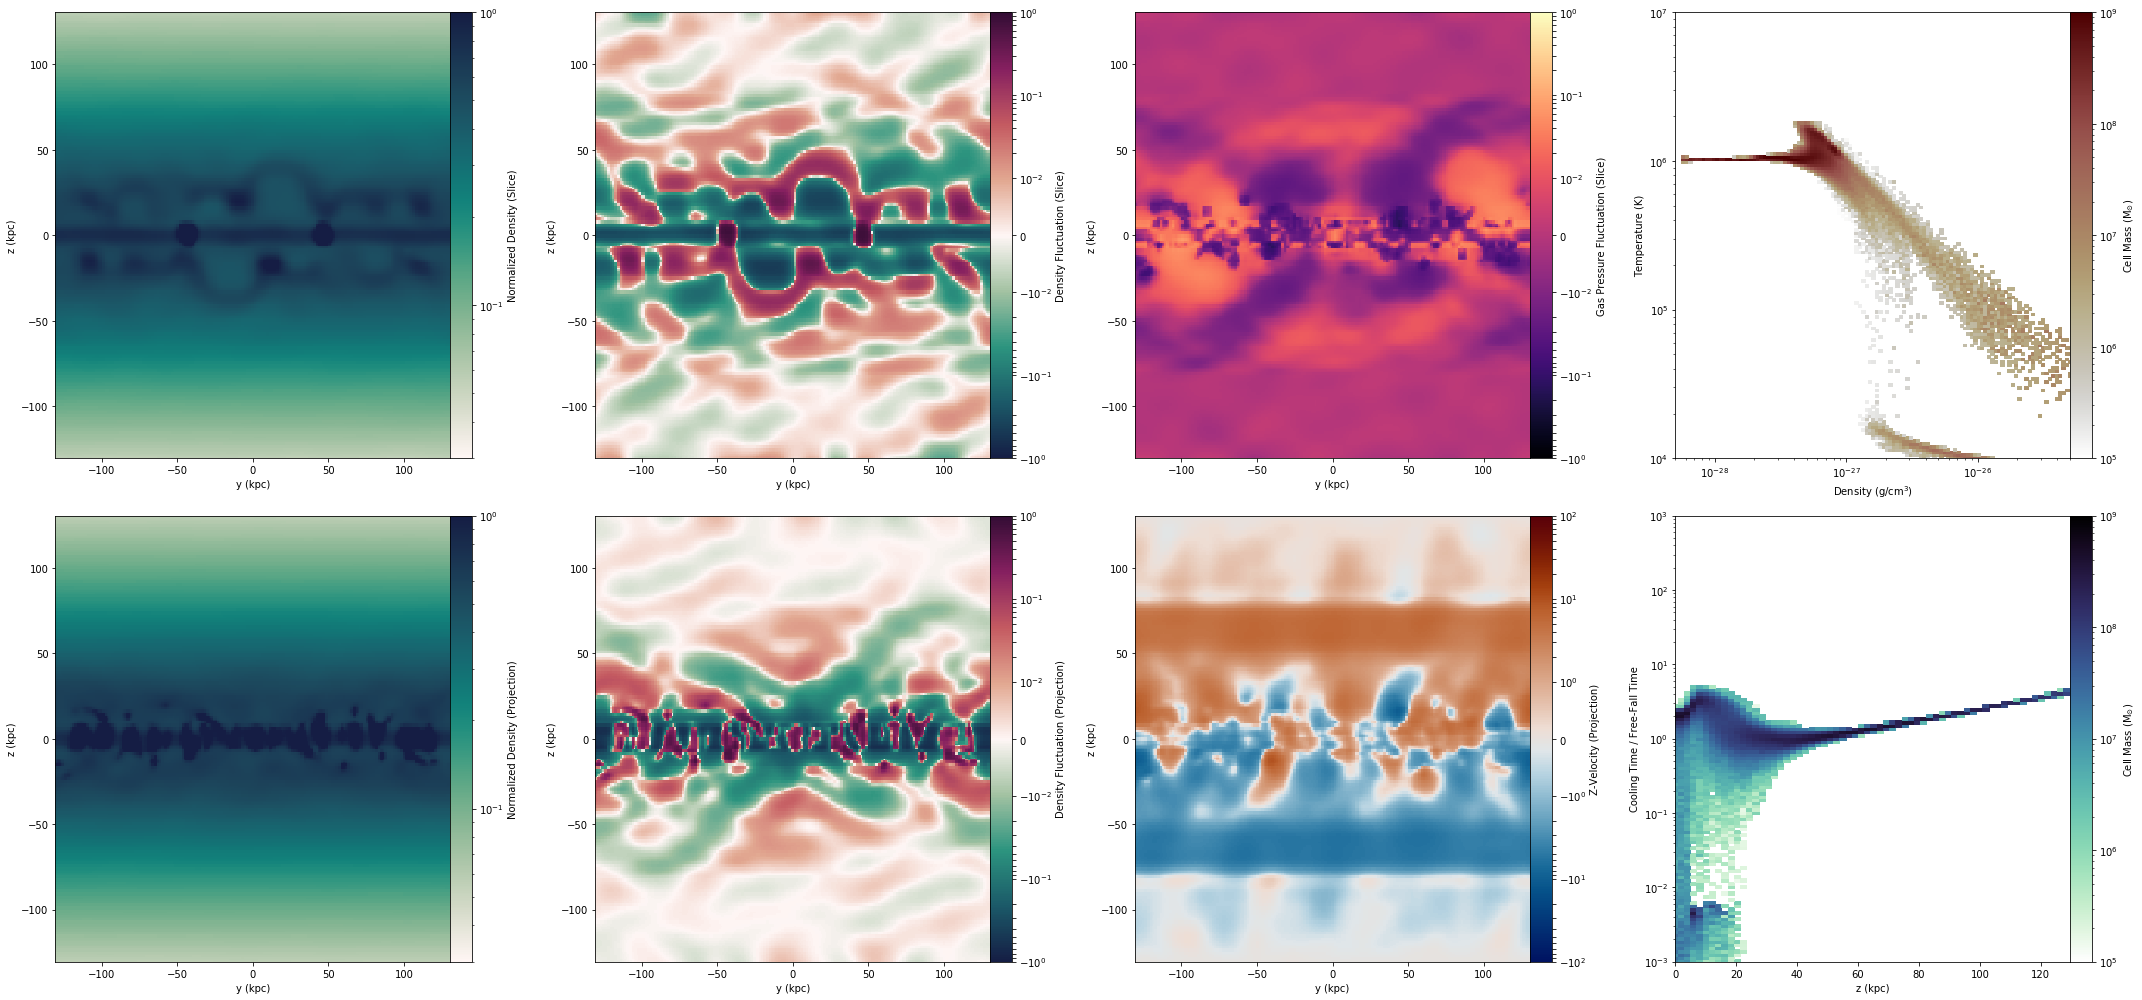

In [22]:
#folder = 'isothermal_tctf_1.0_beta_4.0'
#folder = 'isentropic_tctf_1.0_beta_4.0'
#folder = 'btest_poisson'
#folder = 'isentropic_btest'

#folder = 'isentropic_tctf_1.0'
#folder = 'isothermal_btest'
#folder = 'isentropic_btest'
#folder = 'isentropic_tctf_1.0_beta_4.0'
folder = 'isothermal_T0_0.01'


half_range = 1
rho0 = 1e-27
view = 'x'

for i in [24]:
    ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
    ds.add_field(('gas', 'divB'), function = _divB, units = 'G/kpc')
    fig, ax = pt.plot_density_slices(ds)
    


In [41]:
ad = ds.all_data()
ad[('gas', 'plasma_beta')]


YTArray([3.97185492, 3.96601241, 3.97141603, ..., 4.00427732, 3.99310863,
         3.98083706]) (dimensionless)

yt : [INFO     ] 2019-10-17 12:43:19,651 Parameters: current_time              = 8.4999990045463
yt : [INFO     ] 2019-10-17 12:43:19,652 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-17 12:43:19,653 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-17 12:43:19,654 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-17 12:43:19,655 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-17 12:43:19,677 Gathering a field list (this may take a moment.)
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:39: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'External Acceleration Z', units = 'cm/s**2')
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:42: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'Free Fall Time', units = 's')
/simo


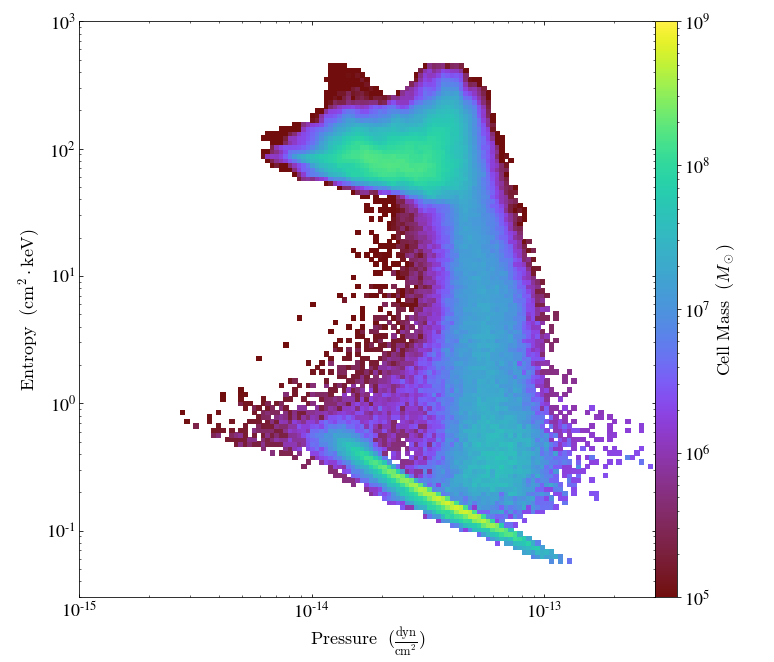

In [53]:
folder = 'isentropic_tctf_1.0'
folder = 'isothermal_tctf_1.0'
i = 85
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ad = ds.all_data()

xfield = ('gas', 'pressure')
yfield = ('gas', 'entropy')
zfield = ('gas', 'cell_mass')
ph = yt.PhasePlot(ad, xfield, yfield, zfield, weight_field = None)
ph.set_unit(zfield, 'Msun')
ph.set_zlim(zfield, 1e5, 1e9)

ph.set_xlim(1e-15, 3e-13)
ph.set_ylim(3e-2, 1e3)
ph.show()

In [12]:
# calculate cold fraction by mass
T0 = 1e6
folder = 'isothermal_tctf_10.0_beta_100.0'
ds = yt.load('../../simulations/%s/DD0100/DD0100'%folder)
ad = ds.all_data()
cold = ad[('gas', 'temperature')] <= T0/3.
hot = ad[('gas', 'temperature')] > T0/3.

total_mass = np.sum(ad[('gas', 'cell_mass')].in_units('Msun'))

cold_mass = np.sum(ad[('gas', 'cell_mass')][cold].in_units('Msun'))
hot_mass = np.sum(ad[('gas', 'cell_mass')][hot].in_units('Msun'))

print("test: %e"%ad.quantities.total_quantity(('gas', 'cell_mass')).in_units('Msun'))
print("cold: %e, hot = %e, total = %e"%(cold_mass, hot_mass, cold_mass + hot_mass))
print(cold_mass / total_mass)

yt : [INFO     ] 2019-10-22 11:01:45,732 Parameters: current_time              = 99.99999016569
yt : [INFO     ] 2019-10-22 11:01:45,733 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-22 11:01:45,733 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-22 11:01:45,734 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-22 11:01:45,735 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-22 11:01:45,809 Gathering a field list (this may take a moment.)


test: 9.348177e+10
cold: 3.023185e+10, hot = 6.324992e+10, total = 9.348177e+10
0.32339833461791123 dimensionless


In [10]:
# calculate cold fraction by mass
T0 = 1e6
folder = 'isentropic_tctf_10.0'
ds = yt.load('../../simulations/%s/DD0100/DD0100'%folder)
ad = ds.all_data()
cold = ad[('gas', 'temperature')] <= T0/3.
hot = ad[('gas', 'temperature')] > T0/3.

total_mass = np.sum(ad[('gas', 'cell_mass')].in_units('Msun'))

cold_mass = np.sum(ad[('gas', 'cell_mass')][cold].in_units('Msun'))
hot_mass = np.sum(ad[('gas', 'cell_mass')][hot].in_units('Msun'))

print("test: %e"%ad.quantities.total_quantity(('gas', 'cell_mass')).in_units('Msun'))
print("cold: %e, hot = %e, total = %e"%(cold_mass, hot_mass, cold_mass + hot_mass))
print(cold_mass / total_mass)

yt : [INFO     ] 2019-10-22 11:01:08,882 Parameters: current_time              = 99.999990176833
yt : [INFO     ] 2019-10-22 11:01:08,883 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-22 11:01:08,884 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2019-10-22 11:01:08,885 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2019-10-22 11:01:08,886 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-22 11:01:08,917 Gathering a field list (this may take a moment.)


test: 4.242820e+10
cold: 1.323353e+10, hot = 2.919467e+10, total = 4.242820e+10
0.31190410666276247 dimensionless
